# LESSON 02 Running and Passing Information to a Python Script

Running your Python scripts is an important step in the development process
because it is in this manner that you’ll get to find out if your code works as
you intended it to. Also, it is often the case that we would need to pass
information to the Python script for it to function.

In this tutorial, you will discover various ways of running and passing
information to a Python script.

After completing this tutorial, you will know:

*    How to run a Python script using the command-line interface, the Jupyter Notebook, or an Integrated Development Environment (IDE) 
*    How to pass information to a Python script using the  `sys.argv`  command by hard-coding the input variables in the Jupyter Notebook or through the interactive use of the `input()` function. 

## Tutorial Overview

This tutorial is divided into two parts; they are:

*    Running a Python Script
  *     Using a Command-Line Interface
  *     Using the Jupyter Notebook
  *     Using an Integrated Development Environment (IDE)
*    Python Input

## Running a Python Script:
### Using a Command-Line Interface

The command-line interface is used extensively for running Python code. 

Let’s test a few commands by first opening up a Command Prompt or Terminal
window, depending on the operating system that you are working on. 

Typing the  python command in your command-line interface will initiate a Python
interactive session. You will see that a message appears informing you of the
Python version that you are using.

Any statements you write in your command-line interface during an interactive
session will be executed immediately. For example, typing out 2 + 3 returns a
value of 5:

In [22]:
!python
2+3

Python 3.8.10 (default, Mar 15 2022, 12:22:08) 
[GCC 9.4.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> 

Using an interactive session in this manner has its advantages because you can
test out lines of Python code easily and quickly. However, it is not the ideal
option if we are more interested in writing lengthier programs, as would be the
case if we are developing a machine learning algorithm. The code also disappears
once the interactive session is terminated. 

An alternative option would be to run a Python script. Let’s start with a simple
example first. 

In a text editor (such as Notepad++, Visual Studio Code, or Sublime Text), type
the statement  `print("Hello World!")`  and save the file to test_script.py or
any other name of your choice as long as you include a .py extension. 

In [ ]:
!python test_script.py

hello world


Let’s now write a script file that loads a pre-trained Keras model and outputs a
prediction for this image of a dog. It is often the case that we would also need
to pass information to the Python script in the form of command-line
**arguments**.  For this purpose, we will be using the `sys.argv` command to
pass to the script the image path and the number of top guesses to return. We
could have as many input arguments as the code requires, in which case we would
keep on reading the inputs from the argument list.  

The script file that we will be running now contains the following code:

In [ ]:
import sys
import numpy as np
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
 
# Load the VGG16 model pre-trained on the ImageNet dataset
vgg16_model = vgg16.VGG16(weights='imagenet')
 
# Read the command-line argument passed to the interpreter when invoking the script
image_path = sys.argv[1]
top_guesses = sys.argv[2]
 
# Load the image, resized according to the model target size
img_resized = image.load_img(image_path, target_size=(224, 224))
 
# Convert the image into an array
img = image.img_to_array(img_resized) 
 
# Add in a dimension
img = np.expand_dims(img, axis=0) 
 
# Scale the pixel intensity values
img = preprocess_input(img) 
 
# Generate a prediction for the test image
pred_vgg = vgg16_model.predict(img)
 
# Decode and print the top 3 predictions
print('Prediction:', decode_predictions(pred_vgg, top=int(top_guesses)))

2022-07-14 10:32:11.167981: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-07-14 10:32:11.168060: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-07-14 10:32:11.168103: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2022-07-14 10:32:11.168142: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2022-07-14 10:32:11.168181: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

FileNotFoundError: [Errno 2] No such file or directory: '--ip=127.0.0.1'

In the above code, we read the command line arguments using sys.argv[1] and
sys.argv[2] for the first two arguments. We can run the script by making use of
the python command followed by the name of the script file and further passing
it as arguments for the image path (after the image has been saved to the disk)
and the number of top guesses that we would like to predict:

In [ ]:
!python pretrained_model.py dog.jpg 3

2022-07-14 10:41:24.400856: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-07-14 10:41:24.400949: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-07-14 10:41:24.401017: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2022-07-14 10:41:24.401082: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcurand.so.10'; dlerror: libcurand.so.10: cannot open shared object file: No such file or directory
2022-07-14 10:41:24.401144: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Here, **pretrained_model.py** is the name of the script file, and the dog.jpg
image has been saved into the same directory that also contains the Python
script. 

The generated top three guesses are the following:

`Prediction: [[('n02107683', 'Bernese_mountain_dog', 0.7381582), ('n02107908', 'Appenzeller', 0.16824469), ('n02108000', 'EntleBucher', 0.057708777)]]`

But there can be more in the command line. For example, the following command
line will run the script in “optimized” mode, in which the debugging variable
`__debug__` is set to False, and assert statements are skipped:

In [ ]:
!python -O test_script.py

hello world


And the following is to launch the script with a Python module, such as the debugger:

In [ ]:
!python -m pdb test_script.py

> /media/ST4000/juan/PycharmProjectsAorus/MachineLearning/Jason Brownlee - Python for Machine Learning /test_script.py(1)<module>()
-> print('hello world')
(Pdb) 
--KeyboardInterrupt--
(Pdb) 

## Using Jupyter Notebook

Running a Python script from the command-line interface is a straightforward
option if your code generates a string output and not much else. 

However, when we are working with images, it is often desirable to generate a
visual output too. We might be checking the correctness of any pre-processing
applied to the input image before feeding it into a neural network or
visualizing the result that the neural network produces. The Jupyter Notebook
offers an interactive computing environment that can help us achieve this.

One way of running a Python script through the Jupyter Notebook interface is to
simply add the code to a “cell” in the notebook. But this means your code stays
inside the Jupyter notebook and cannot be accessed elsewhere, such as using the
command line as above. Another way is to use the run magic command, prefixed by
the  %  character. Try typing the following code into a cell in Jupyter
Notebook:

In [ ]:
%run pretrained_model.py dog.jpg 3

Prediction: [[('n02107683', 'Bernese_mountain_dog', 0.7381582), ('n02107908', 'Appenzeller', 0.16824469), ('n02108000', 'EntleBucher', 0.057708777)]]


Here, we are again specifying the name of the Python script file as
`pretrained_model.py`, followed by the image path and the number of top guesses
as the input arguments. You will see that the top three predictions are printed
beneath the cell that produced this result. 

Now, let’s say that we would like to display the input image in order to check
that it has been loaded according to the model target size. For this purpose, we
will modify the code slightly as follows and save it into a new Python script,
`pretrained_model_image.py`:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
 
# Load the VGG16 model pre-trained on the ImageNet dataset
vgg16_model = vgg16.VGG16(weights='imagenet')
 
# Read the arguments passed to the interpreter when invoking the script
image_path = sys.argv[1]
top_guesses = sys.argv[2]
 
# Load the image, resized according to the model target size
img_resized = image.load_img(image_path, target_size=(224, 224))
 
# Convert the image into an array
img = image.img_to_array(img_resized)
 
# Display the image to check that it has been correctly resized
plt.imshow(img.astype(np.uint8))
 
# Add in a dimension
img = np.expand_dims(img, axis=0) 
 
# Scale the pixel intensity values
img = preprocess_input(img) 
 
# Generate a prediction for the test image
pred_vgg = vgg16_model.predict(img)
 
# Decode and print the top 3 predictions
print('Prediction:', decode_predictions(pred_vgg, top=int(top_guesses)))

FileNotFoundError: [Errno 2] No such file or directory: '--ip=127.0.0.1'

Running the newly saved Python script through the Jupyter Notebook interface now
displays the resized $224 \times 224$ pixel image, in addition to printing the
top three predictions:

Prediction: [[('n02107683', 'Bernese_mountain_dog', 0.7381582), ('n02107908', 'Appenzeller', 0.16824469), ('n02108000', 'EntleBucher', 0.057708777)]]


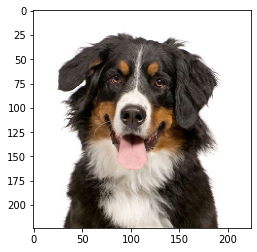

In [ ]:
%run pretrained_model_image.py dog.jpg 3

Alternatively, we can trim down the code to the following (and save it to yet
another Python script, `pretrained_model_inputs.py`):

TypeError: bad operand type for unary -: 'str'

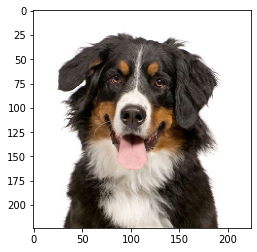

In [ ]:
# Load the VGG16 model pre-trained on the ImageNet dataset
vgg16_model = vgg16.VGG16(weights='imagenet')
 
# Load the image, resized according to the model target size
img_resized = image.load_img(image_path, target_size=(224, 224))
 
# Convert the image into an array
img = image.img_to_array(img_resized) 
 
# Display the image to check that it has been correctly resized
plt.imshow(img.astype(np.uint8))
 
# Add in a dimension
img = np.expand_dims(img, axis=0) 
 
# Scale the pixel intensity values
img = preprocess_input(img) 
 
# Generate a prediction for the test image
pred_vgg = vgg16_model.predict(img)
 
# Decode and print the top 3 predictions
print('Prediction:', decode_predictions(pred_vgg, top=top_guesses))

And define the input variables in one of the cells of the Jupyter Notebook
itself. Running the Python script in this manner would require that we also make
use of the  `-i`  option after the  `%run`  magic:

TypeError: bad operand type for unary -: 'str'

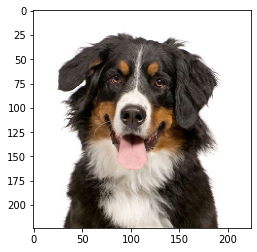

In [ ]:
%run -i pretrained_model_inputs.py

## Using an Integrated Development Environment (IDE)

Another option is to run the Python script from an IDE. This requires that a
project is created first, and the Python script with a `.py` extension is added
to it. 

If we had to consider PyCharm or Visual Studio Code as the IDE of choice, this
would require that we create a new project and subsequently choose the version
of Python interpreter that we would like to work with. After adding the Python
script to the newly created project, this can be run to generate an output. The
following is a screenshot of running Visual Studio Code on macOS. Depending on
the IDE, there should be an option to run the code with or without the debugger.

![](https://machinelearningmastery.com/wp-content/uploads/2021/12/VScode.png)

## Python Input

We have, so far, considered the options of passing information to the Python
script using the `sys.argv`  command or by hard-coding the input variables in
Jupyter Notebook before running the script. 

Another option is to take input from the user through the `input()` function. 

Consider the following code:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
 
# Load the VGG16 model pre-trained on the ImageNet dataset
vgg16_model = vgg16.VGG16(weights='imagenet')
 
# Ask the user for manual inputs
image_path = input("Enter image path: ")
top_guesses = input("Enter number of top guesses: ")
 
# Load the image, resized according to the model target size
img_resized = image.load_img(image_path, target_size=(224, 224))
 
# Convert the image into an array
img = image.img_to_array(img_resized)
 
# Add in a dimension
img = np.expand_dims(img, axis=0) 
 
# Scale the pixel intensity values
img = preprocess_input(img) 
 
# Generate a prediction for the test image
pred_vgg = vgg16_model.predict(img)
 
# Decode and print the top 3 predictions
print('Prediction:', decode_predictions(pred_vgg, top=int(top_guesses)))

Here, the user is prompted to manually enter the image path (the image has been
saved into the same directory containing the Python script and, hence,
specifying the image name is sufficient) and the number of top guesses to
generate. Both input values are of type string; however, the number of top
guesses is later cast to an integer when this is used. 

No matter if this code is run in the command-line interface, in Jupyter
Notebook, or in a Python IDE, it will prompt the user for the required inputs
and subsequently generate the number of predictions that the user asks for. 
Further Reading

This section provides more resources on the topic if you are looking to go
deeper.  

### Books

*    [Python Fundamentals](https://www.amazon.com/Python-Fundamentals-practical-learning-real-world-ebook/dp/B07K4CVYND/ref=sr_1_1?keywords=python+fundamentals+ebook&qid=1638986660&sr=8-1), 2018.
*    [Python Machine Learning Blueprints](https://www.amazon.com/Python-Machine-Learning-Blueprints-developing-ebook/dp/B07JLMHWRG), 2019.

### Summary

In this tutorial, you discovered various ways of running and passing information
to a Python script.

Specifically, you learned:

*    How to run a Python script using the command-line interface, the Jupyter Notebook, or an Integrated Development Environment (IDE)
*    How to pass information to a Python script using the sys.argv  command by hard-coding the input variables in Jupyter Notebook or through the interactive use of the `input()` function
